This exercise demonstrates that recursion, although faster to program, is not the most efficient implementation of an algorithm Recursion functions stack function calls on top of each other until the base case - the case where recursion stops - is reached.  Loops might take more time to code, but they take less space in memory because they only call the function once. 

We examined and compared performance of two functions that compute the factorial of an integer. The first of these functions uses recursion, while the other calculates the factorial in a for loop. On average, the recursion algorithm took close to 5 time longer to run than the iterative algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer  
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Set random seed for reproducibility
np.random.seed(123)

# Generate and print random array
arr = np.random.randint(low = 100, high = 500, dtype=int, size=10)
print(arr)

[465 482 422 198 330 117 183 206 223 157]


In [3]:
def fact_rec(x):
    
    # Base case - recursion will stop once it reaches this stage
    if x == 0:
        return 1
    
    # If not in base case, then continue recursion
    else:
        return x * fact_rec(x-1)

# Print result of 5! to test function  
print(fact_rec(5))

120


In [4]:
# Initiate a list to hold runtime for the recursive factorial function
recur_timelist = []

# Loop over each element in the random array
for elem in arr:
    
    # Record start time
    start = timer()
    
    # Calculate factorial
    fact_rec(elem)
    
    # Record end time
    end = timer()
    
    # Calculate milliseconds elapsed
    delta = np.round((end-start) * 1000,4)
    
    # Append runtime to runtime list
    recur_timelist.append(delta)
    
    # Print runtime for verification
    print(delta)

0.881
0.3018
0.3054
0.365
0.3311
0.0909
0.1402
0.1264
0.1367
0.1051


In [5]:
def fact_iter(x):
    
    # Initiate variable to store factorial results
    product = 1
    
    # Loop to calculate factorial
    for i in range(x):
        
        # Multiply factorial variable with current element in loop
        product *= (i+1)
        
    # Return factorial results
    return product

# Print result of 5! to test function  
print(fact_iter(5))

120


In [6]:
# Initiate a list to hold runtime for the iterative factorial function
iter_timelist = []

# Loop over each element in the random array
for elem in arr:
    
    # Record start time
    start = timer()
    
    # Calculate factorial
    fact_iter(elem)
    
    # Record end time
    end = timer()
    
    # Calculate milliseconds elapsed
    delta = np.round((end-start) * 1000,4)
    
    # Append runtime to runtime list
    iter_timelist.append(delta)
    
    # Print runtime for verification
    print(delta)

0.1952
0.2216
0.1549
0.0486
0.0849
0.0221
0.0379
0.0454
0.0525
0.0344


In [7]:
# Create dataframe
runtime_df = pd.DataFrame(data ={"Recursion": recur_timelist, "Iteration" : iter_timelist}, index=arr)

# Sort by index - the randomly generated array above
runtime_df.sort_index(ascending=True, axis=0, inplace=True)

# Display table
runtime_df

,Iteration,Recursion
117,0.0221,0.0909
157,0.0344,0.1051
183,0.0379,0.1402
198,0.0486,0.3650
206,0.0454,0.1264
223,0.0525,0.1367
330,0.0849,0.3311
422,0.1549,0.3054
465,0.1952,0.8810
482,0.2216,0.3018


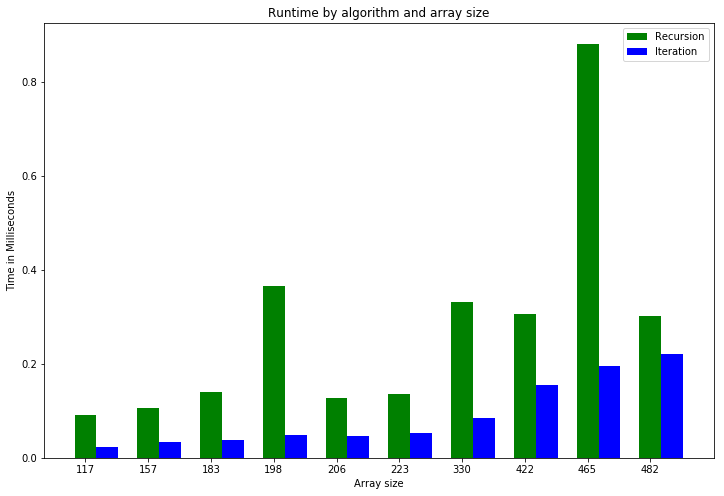

In [8]:
# set height of bar
width = .35

# set height of bar
bars1 = runtime_df.Recursion
bars2 = runtime_df.Iteration


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]

# Start the matplotlib.pyplot figure and add the bar graphs
fig, ax = plt.subplots(figsize=(12, 8))
res1 = ax.bar(r1, bars1, width, color='green')
res2 = ax.bar(r2, bars2, width, color='blue')


# add labels, title and axes ticks
ax.set_title('Runtime by algorithm and array size')
ax.set_ylabel('Time in Milliseconds')
ax.set_xlabel('Array size')
ax.set_xticks(range(runtime_df.shape[0]))
ax.set_xticklabels(runtime_df.index.astype(str))

# Add legend
ax.legend((res1[0], res2[0]), ('Recursion', 'Iteration'))

# Show graph
plt.show()